
# 🧹 Data Cleaning & Preprocessing - Sales Dataset

This notebook covers the complete data cleaning and preprocessing pipeline for a sales dataset including:
- Handling missing values
- Removing duplicates
- Fixing data types
- Encoding categorical variables
- Feature engineering


## 📦 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Set visual style
sns.set_theme(style="whitegrid")


## 📥 2. Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("sales_data.csv")

# View basic structure
df.head()


,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
0,sm-7039-405828,2024-07-23,William Bryant,Central,Table,Furniture,1217.80,10,0.08,-81.68
1,Pt-2985-825301,2022-10-20,Benjamin Bentley,East,Laptop,Technology,1852.04,9,0.45,-88.34
2,KJ-4575-679683,2021-03-15,Charles Webb,West,Printer,Technology,632.41,9,0.03,83.61
3,Pc-5914-111200,2022-05-23,Denise Morris,East,Paper,Office Supplies,NaN,3,0.42,0.00
4,Qp-3590-968551,2024-10-17,Stephen Andrews,East,Laptop,Technology,1678.02,8,NaN,-77.77


## 🔍 3. Inspect Data

In [3]:
# Check shape, info, and summary
print("Shape:", df.shape)
df.info()
df.describe(include='all')


Shape: (5200, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5200 non-null   object 
 1   Order Date     5200 non-null   object 
 2   Customer Name  4917 non-null   object 
 3   Region         5200 non-null   object 
 4   Product        5200 non-null   object 
 5   Category       5200 non-null   object 
 6   Sales          4935 non-null   float64
 7   Quantity       5200 non-null   int64  
 8   Discount       4667 non-null   float64
 9   Profit         5200 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 406.4+ KB


,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
count,5200,5200,4917,5200,5200,5200,4935.000000,5200.000000,4667.000000,5200.000000
unique,5000,1700,4563,4,12,3,NaN,NaN,NaN,NaN
top,nV-7058-699064,2022-12-02,Michael Johnson,Central,Table,Furniture,NaN,NaN,NaN,NaN
freq,2,9,4,1328,464,1796,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,992.846209,5.459615,0.248110,100.997915
std,NaN,NaN,NaN,NaN,NaN,NaN,580.414609,2.869393,0.144576,267.376709
min,NaN,NaN,NaN,NaN,NaN,NaN,10.550000,1.000000,0.000000,-592.940000
25%,NaN,NaN,NaN,NaN,NaN,NaN,487.140000,3.000000,0.120000,-45.547500
50%,NaN,NaN,NaN,NaN,NaN,NaN,991.250000,5.000000,0.250000,38.590000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1491.015000,8.000000,0.370000,240.335000


In [4]:
df.tail() #check the last 5 rows

,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
5195,CH-3995-999036,2020-06-05,Brian Irwin,South,Bookcase,Furniture,365.25,3,0.21,-43.73
5196,QJ-1798-861727,2022-07-04,Jamie Smith,East,Laptop,Technology,737.68,1,0.46,150.44
5197,EY-1909-444977,2023-09-15,Rhonda Powell,West,Bookcase,Furniture,1272.57,4,0.40,495.14
5198,QL-7563-163842,2021-11-13,Emily Christian,West,Printer,Technology,260.58,6,0.09,74.51
5199,nt-8300-957227,2023-11-23,Thomas Thompson,East,Pen,Office Supplies,NaN,9,0.12,0.00


## ❌ 4. Handle Missing Values

In [5]:
# Check missing values
df.isnull().sum()


Order ID           0
Order Date         0
Customer Name    283
Region             0
Product            0
Category           0
Sales            265
Quantity           0
Discount         533
Profit             0
dtype: int64

In [6]:
df[df["Customer Name"].isnull()] #check missing values in customer name

,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
22,Qf-3039-357982,2024-10-22,NaN,Central,Bookcase,Furniture,634.84,1,0.45,265.59
53,Gw-4092-401322,2023-06-19,NaN,South,Chair,Furniture,832.11,6,NaN,-159.38
67,VY-0774-046604,2021-08-18,NaN,South,Bookcase,Furniture,NaN,2,NaN,0.00
78,ZK-1047-412229,2021-01-10,NaN,South,Pen,Office Supplies,568.37,7,NaN,-101.52
94,yr-1585-004061,2021-10-26,NaN,West,Label,Office Supplies,543.70,7,0.13,-156.76
...,...,...,...,...,...,...,...,...,...,...
5103,Yz-2277-701270,2024-03-16,NaN,Central,Stapler,Office Supplies,876.95,9,0.40,-68.45
5123,TU-2360-928284,2023-03-24,NaN,South,Phone,Technology,1101.75,7,0.04,369.66
5124,ur-8881-877302,2024-12-05,NaN,West,Printer,Technology,1845.86,9,0.44,308.12
5153,Hw-4130-270398,2025-04-10,NaN,East,Chair,Furniture,829.25,9,0.40,133.44


In [7]:
df[df["Sales"].isnull()] #check missing values in sales      

,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
3,Pc-5914-111200,2022-05-23,Denise Morris,East,Paper,Office Supplies,NaN,3,0.42,0.0
15,am-3704-775628,2020-05-03,Mr. Patrick Kennedy,South,Monitor,Technology,NaN,5,0.17,0.0
21,pt-1200-874280,2022-12-17,Kelly Leon MD,West,Paper,Office Supplies,NaN,4,0.11,0.0
29,Jb-2181-388327,2022-04-22,Heidi Hammond,East,Printer,Technology,NaN,6,0.39,0.0
31,zw-0696-430182,2022-04-14,Jeffrey Sutton,West,Phone,Technology,NaN,6,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
5042,Jb-2181-388327,2022-04-22,Heidi Hammond,East,Printer,Technology,NaN,6,0.39,0.0
5047,rG-5801-695237,2024-12-01,Heidi Bruce,Central,Bookcase,Furniture,NaN,2,0.26,0.0
5151,nV-7058-699064,2021-11-08,Kristin Clarke,West,Bookcase,Furniture,NaN,3,0.30,0.0
5156,CW-6495-882455,2020-11-28,Scott White,East,Phone,Technology,NaN,2,0.15,0.0


In [8]:
df[df['Discount'].isnull()] #check missing values in discount

,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
4,Qp-3590-968551,2024-10-17,Stephen Andrews,East,Laptop,Technology,1678.02,8,NaN,-77.77
11,hL-8851-729871,2023-02-25,Stephanie Brown,South,Stapler,Office Supplies,1320.23,6,NaN,-296.84
12,yl-0736-592368,2025-01-25,Lisa Mendez,Central,Pen,Office Supplies,1814.85,3,NaN,899.50
14,Nw-1392-761807,2021-07-27,Elizabeth Harris,Central,Paper,Office Supplies,894.56,6,NaN,419.46
19,eq-3236-874988,2024-04-05,Erin Davis,East,Pen,Office Supplies,1912.00,7,NaN,-151.54
...,...,...,...,...,...,...,...,...,...,...
5166,GT-3128-559150,2022-05-05,Jason Benton,East,Monitor,Technology,709.33,8,NaN,243.35
5177,IR-1963-934022,2023-10-04,Erika May,South,Chair,Furniture,388.70,4,NaN,25.87
5181,rp-0673-348858,2024-04-12,Daniel Richards,West,Label,Office Supplies,1923.05,9,NaN,699.52
5184,yX-4731-063334,2023-10-30,Robert Larson,East,Laptop,Technology,604.14,1,NaN,-0.87


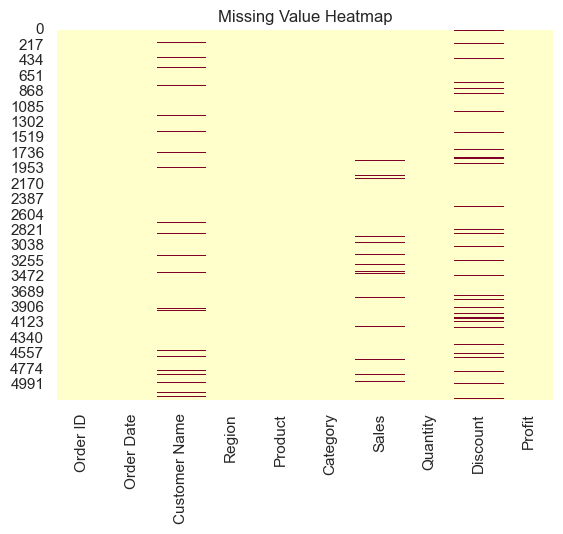

In [9]:
# Visual check before handling missing value
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Missing Value Heatmap")
plt.show()

In [10]:
# Fill missing values
df['Customer Name'].fillna("Unknown", inplace=True)
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Discount'].fillna(0, inplace=True)


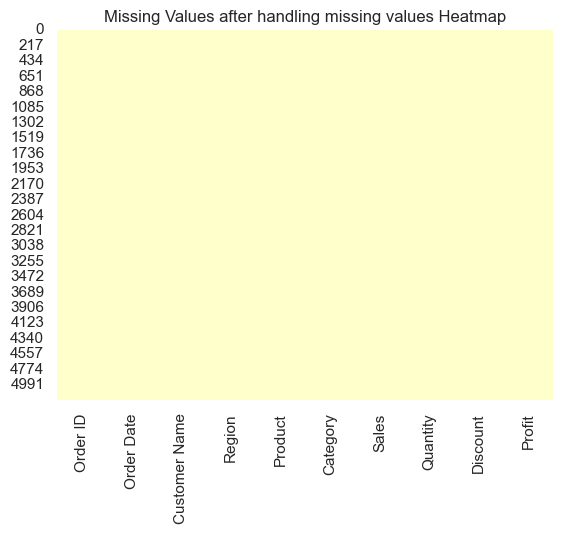

In [11]:
# Visual check
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Missing Values after handling missing values Heatmap")
plt.show()


## 🔁 5. Remove Duplicates

In [12]:
# Check for duplicates
df[df.duplicated()]

,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit
5000,ub-5590-870913,2020-12-09,Monique Gregory,East,Monitor,Technology,475.74,1,0.45,-18.55
5001,lW-1990-232356,2020-09-01,Jeremiah Terrell,East,Laptop,Technology,1845.35,10,0.28,701.36
5002,lC-5430-846194,2021-07-07,Catherine Brown,East,Label,Office Supplies,255.66,8,0.46,-68.81
5003,FX-5059-973432,2023-04-05,Christopher Nichols,West,Table,Furniture,1841.65,3,0.10,401.15
5004,Ud-5517-758531,2023-08-08,Joel Myers,East,Phone,Technology,641.12,8,0.00,48.14
...,...,...,...,...,...,...,...,...,...,...
5195,CH-3995-999036,2020-06-05,Brian Irwin,South,Bookcase,Furniture,365.25,3,0.21,-43.73
5196,QJ-1798-861727,2022-07-04,Jamie Smith,East,Laptop,Technology,737.68,1,0.46,150.44
5197,EY-1909-444977,2023-09-15,Rhonda Powell,West,Bookcase,Furniture,1272.57,4,0.40,495.14
5198,QL-7563-163842,2021-11-13,Emily Christian,West,Printer,Technology,260.58,6,0.09,74.51


In [13]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 200


In [14]:
# Drop duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 200
Duplicates after: 0


In [15]:
df[df.duplicated()] #check duplicates again 
# empty dataframe means no duplicates found

,Order ID,Order Date,Customer Name,Region,Product,Category,Sales,Quantity,Discount,Profit


## 🧼 6. Fix Data Types

In [16]:
df.dtypes #check data types of each column

Order ID          object
Order Date        object
Customer Name     object
Region            object
Product           object
Category          object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [17]:
# Convert date column
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Convert categoricals
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Product'] = df['Product'].astype('category')


In [18]:
df.dtypes #verify data types after conversion

Order ID                 object
Order Date       datetime64[ns]
Customer Name            object
Region                 category
Product                category
Category               category
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## 🧪 7. Data Validation

In [19]:
# Check for negative or invalid values
# in our dataset there are two columns that should not have negative values: Quantity and Sales
print("Negative values in Quantity:", df[df['Quantity'] < 0].shape[0])  
print("Negative values in Sales:", df[df['Sales'] < 0].shape[0])



Negative values in Quantity: 0
Negative values in Sales: 0


In [20]:
df.describe() #check summary statistics of the dataset

,Order Date,Sales,Quantity,Discount,Profit
count,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2022-10-18 11:38:24,992.447774,5.473000,0.222732,100.677636
min,2020-04-20 00:00:00,10.550000,1.000000,0.000000,-592.940000
25%,2021-07-16 18:00:00,520.585000,3.000000,0.080000,-45.392500
50%,2022-10-20 00:00:00,991.250000,5.000000,0.220000,38.270000
75%,2024-01-20 00:00:00,1465.250000,8.000000,0.360000,240.430000
max,2025-04-20 00:00:00,1999.720000,10.000000,0.500000,974.330000
std,NaN,564.242368,2.868958,0.156442,266.514789


## 🧱 8. Encoding  Categorical Variable 

In [21]:
# One-hot encode Region and Category
df_encoded = pd.get_dummies(df, columns=['Region', 'Category'], drop_first=True)
df_encoded.head()


,Order ID,Order Date,Customer Name,Product,Sales,Quantity,Discount,Profit,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
0,sm-7039-405828,2024-07-23,William Bryant,Table,1217.80,10,0.08,-81.68,False,False,False,False,False
1,Pt-2985-825301,2022-10-20,Benjamin Bentley,Laptop,1852.04,9,0.45,-88.34,True,False,False,False,True
2,KJ-4575-679683,2021-03-15,Charles Webb,Printer,632.41,9,0.03,83.61,False,False,True,False,True
3,Pc-5914-111200,2022-05-23,Denise Morris,Paper,991.25,3,0.42,0.00,True,False,False,True,False
4,Qp-3590-968551,2024-10-17,Stephen Andrews,Laptop,1678.02,8,0.00,-77.77,True,False,False,False,True


## 🧰 9. Feature Engineering

In [22]:
# Extract year, month, and day of week
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.day_name()

df[['Order Date', 'Year', 'Month', 'DayOfWeek']].head()


,Order Date,Year,Month,DayOfWeek
0,2024-07-23,2024,7,Tuesday
1,2022-10-20,2022,10,Thursday
2,2021-03-15,2021,3,Monday
3,2022-05-23,2022,5,Monday
4,2024-10-17,2024,10,Thursday


## ✅ 10. Final Checks

In [23]:
df.isnull().sum()
df.duplicated().sum()
df.dtypes


Order ID                 object
Order Date       datetime64[ns]
Customer Name            object
Region                 category
Product                category
Category               category
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int32
Month                     int32
DayOfWeek                object
dtype: object

## 🎯 Final Notes

- Dataset cleaned and preprocessed.
- Ready for Exploratory Data Analysis or machine learning model building.


# ✅ Save Clean Data

In [24]:
# Save final preprocessed data to CSV
df.to_csv("sales_data_cleaned.csv", index=False)

print("✅ Final preprocessed data saved as 'sales_data_cleaned.csv'")


✅ Final preprocessed data saved as 'sales_data_cleaned.csv'
